<a href="https://colab.research.google.com/github/RosalesLuis123/IA/blob/main/Lab2/Laboratorio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [426]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [342]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# ***Cargamos los datos del dataset***


In [343]:
import pandas as pd

# Leer el conjunto de datos desde el archivo
dataset = pd.read_csv('/content/gdrive/MyDrive/Laboratorio2/dataset.txt', delimiter=',', encoding='utf-8')

# Reemplazar todos los valores NaN por 0
dataset.fillna(0, inplace=True)


dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0.0,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0.0,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0.0,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0.0,0
4,92056,34377,33,19.0,0.000000,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0.0,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0.0,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0.0,0
91711,33776,120598,66,0.0,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0.0,0


# ***Separamos los datos***

In [395]:
# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Separamos en X_test los datos, pero dropeando nuestra y que sería 'hospital_death'
X_test = test_dataset.drop(['hospital_death'], axis=1).values

# Separamos en y_test los datos, pero solo cargando la columna de 'hospital_death', ya que esa será nuestra y
y_test = test_dataset['hospital_death'].values

# Tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'hospital_death' para y_train
X_train = train_dataset.drop(['hospital_death'], axis=1).values
y_train = train_dataset['hospital_death'].values
m_train = len(y_train)

# Convertir 'M' a 1 y 'F' a 0 en la columna 7
X_train[:, 7] = np.where(X_train[:, 7] == 'M', 1, 0)
X_test[:, 7] = np.where(X_test[:, 7] == 'M', 1, 0)

# Imprimimos algunos datos:
# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8s}{:8s}{:10s}{:10s}{:8s}{:8s}{:8s}{:8s}{:8s}{:10s}{:8s}{:12.0f}'.format(
        str(X_train[i, 72]), str(X_train[i, 5]), str(X_train[i, 3]), str(X_train[i, 7]), str(X_train[i, 17]), str(X_train[i, 75]), str(X_train[i, 76]), str(X_train[i, 77]), str(X_train[i, 78]), str(X_train[i, 79]), str(X_train[i, 80]), y_train[i]
    ))

# Mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format(len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format(len(test_dataset)))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
0.01    0       86.0      1         0       0.0     0.0     0.0     0.0     0.0       0.0                0
0.02    0       72.0      1         0       0.0     0.0     0.0     0.0     0.0       0.0                1
0.0     0       36.0      1         0       0.0     0.0     0.0     0.0     0.0       0.0                0
0.06    0       60.0      1         0       0.0     0.0     0.0     0.0     0.0       0.0                0
0.02    0       27.0      0         0       0.0     0.0     0.0     1.0     0.0       0.0                0
0.11    0       71.0      0         0       0.0     0.0     0.0     0.0     0.0       0.0                0
0.0     0       35.0      0         0       0.0     0.0     0.0     0.0     0.0       0.0                0
0.13    0       75.0      0       

# ***Normalización de caracteristicas***

In [396]:
import numpy as np

# Definición de la función featureNormalize
def featureNormalize(X):
    # Creamos una copia de X para mantener los datos originales intactos
    X_norm = X.copy()


    # Calculamos el promedio de cada columna de X
    mu = np.mean(X, axis=0)

    # Calculamos la desviación estándar de cada columna de X
    sigma = np.std(X, axis=0)

    # Si alguna desviación estándar es cero, la reemplazamos con 1 para evitar divisiones por cero
    sigma[sigma == 0] = 1

    # Normalizamos los datos utilizando la fórmula (X - mu) / sigma
    X_norm = (X - mu) / sigma

    # Añadir una columna de unos al principio de la matriz X_norm
    X_norm = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)

    return X_norm, mu, sigma

# Convertir 'M' a 1 y 'F' a 0 en la columna 7
X_train[:, 7] = np.where(X_train[:, 7] == 'M', 1, 0)
X_test[:, 7] = np.where(X_test[:, 7] == 'M', 1, 0)

# Normalizar las características numéricas de X_train y X_test
X_train_numeric = X_train[:, [0, 5, 4, 7, 8, 75, 76, 77,78,79,80]].astype(float)
X_test_numeric = X_test[:, [0, 5, 4, 7, 8, 75, 76, 77,78,79,80]].astype(float)

# Normalizar los datos
X_train_numeric_normalized, mu, sigma = featureNormalize(X_train_numeric)
X_test_numeric_normalized = (X_test_numeric - mu) / sigma  # Usar mu y sigma calculados en X_train para normalizar X_test
# Verifica las columnas de X_train y X_test
print("Columnas de X_train:", X_train.shape[1])
print("Columnas de X_test:", X_test.shape[1])

# Normalizar las características numéricas de X_train y X_test utilizando las mismas columnas
selected_columns = [0, 5, 4, 7, 8, 75, 76, 77, 78, 79, 80]
X_train_numeric = X_train[:, selected_columns].astype(float)
X_test_numeric = X_test[:, selected_columns].astype(float)




Columnas de X_train: 84
Columnas de X_test: 84


In [397]:
# Llamar a la función featureNormalize() para normalizar los datos de X_train
X_norm_train, mu_train, sigma_train = featureNormalize(X_train_numeric)
# Almacenar los datos normalizados en X_norm
X_norm = X_norm_train

print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:12.0f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
   1.000  -0.150    -0.475     0.007   0.000   0.131  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000  -0.056    -0.475     0.867   0.000   0.126  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000  -0.826    -0.475    -0.065   0.000  -0.201  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000   0.157    -0.475    -0.622   0.000   0.602  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000  -0.969    -0.475    -0.827   0.000   0.462  -0.536  -0.114  -0.165    11.941  -0.065          -0
   1.000   0.118    -0.475    -0.690   0.000  -0.646  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000  -0.067    -0.475     0.126   0.000  -0.227  -0.536  -0.114  -0.165    -0.084  -0.065          -0
   1.000  -0.664    -0.475     0.1

In [398]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# print(len(X_ready[0]))

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000   1.000    -0.150    -0.475   0.007   0.000   0.131  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000    -0.056    -0.475   0.867   0.000   0.126  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000    -0.826    -0.475  -0.065   0.000  -0.201  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000     0.157    -0.475  -0.622   0.000   0.602  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000    -0.969    -0.475  -0.827   0.000   0.462  -0.536  -0.114    -0.165  11.941  -0.065
   1.000   1.000     0.118    -0.475  -0.690   0.000  -0.646  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000    -0.067    -0.475   0.126   0.000  -0.227  -0.536  -0.114    -0.165  -0.084  -0.065
   1.000   1.000    -0.664    -0.475   0.1

# ***Creacion de la funcion Sigmoide***

In [399]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función sigmoid
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
    g = 1 / (1 + np.exp(-z))
    return g

In [400]:
print(sigmoid(0))

0.5


In [401]:
z = [0.5, 6, 5]
print(sigmoid(z))

[0.62245933 0.99752738 0.99330715]


# ***Cálculo del costo $J(\theta)$***

In [402]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0

    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J


# ***Descenso por el gradiente***



In [403]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.009.

In [404]:
# Creamos un theta con el mismo número de características que en X_ready
theta = np.zeros(X_ready.shape[1])


# Número de iteraciones será 900 y un alpha de 0.009
num_ite = 900
alpha = 0.009

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, num_ite)

print("########################################################################################################")
print("Los valores de theta calculados son:")
for i, tht in enumerate(theta):
    print(f"theta {i+1}: {tht}")

print("########################################################################################################")
# Mostramos el último costo, este sería el mejor costo
print(f"Con un costo de: {J_historico[-1]}")


########################################################################################################
Los valores de theta calculados son:
theta 1: -1.0053228100091478
theta 2: -1.0053228100091478
theta 3: -0.00845284735681004
theta 4: -0.13495571710029805
theta 5: -0.03642948456941935
theta 6: 0.0
theta 7: -0.03843176574590015
theta 8: -0.017389745605361866
theta 9: 0.05004886507017547
theta 10: 0.04961300424723716
theta 11: 0.03220567615561753
theta 12: 0.02516775043583001
theta 13: 0.06809871227336389
########################################################################################################
Con un costo de: 0.2940787496761962


## ***Grafica de la convergencia del costo***



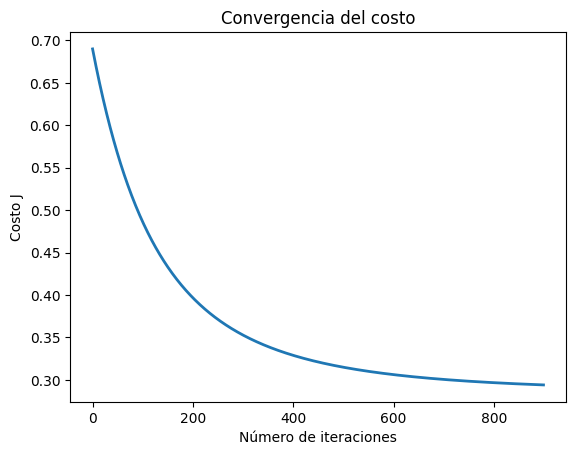

In [405]:
# Graficamos la convergencia del costo
plt.plot(np.arange(len(J_historico)), J_historico, lw=2)
plt.title("Convergencia del costo")
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

In [420]:
X_array = [0,0,56,0,0,1,1,1,1,1,1,1]
X_array_copy = X_array.copy()

# Normalizamos las características para la prueba, utilizando mu y sigma calculados anteriormente, comenzando desde el segundo elemento
X_array_normalized = (np.array(X_array[1:]) - mu) / sigma

# Añadimos un 1 al principio de X_array_normalized para el término de sesgo
X_array_normalized = np.concatenate([[1], X_array_normalized])

# Ajustamos theta para tener la misma longitud que X_array_normalized
theta = theta[:len(X_array_normalized)]

resultados = sigmoid(np.dot(X_array_normalized, theta))

print(f"Una persona con las características: {X_array_copy} ")
print(f'Tiene una probabilidad de morir en el hospital: {resultados * 100} %')


Una persona con las características: [0, 0, 56, 0, 0, 1, 1, 1, 1, 1, 1, 1] 
Tiene una probabilidad de morir en el hospital: 77.77172372681328 %
